In [50]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
%matplotlib inline



/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [51]:
filepath1=('../input/titanic/train.csv')
filepath2=('../input/titanic/test.csv')
data_Train=pd.read_csv(filepath1)
data_Test=pd.read_csv(filepath2)
data_Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
data_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [53]:
data_Train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* cabin with total 687 null values out of total 891 values 
* harder to utilize data with this much null values 

In [54]:
data_Test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [55]:
data_Train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#data visualization
1. Survived is the target variable 

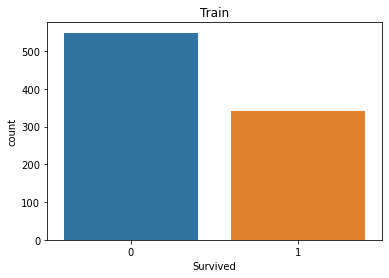

In [56]:

plt.title('Train')
sns.countplot(data_Train['Survived'])

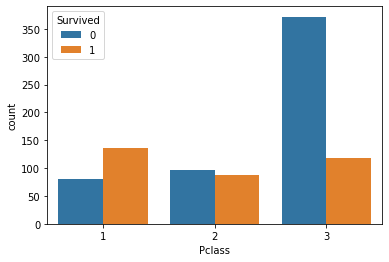

In [57]:
sns.countplot(data_Train['Pclass'],hue=data_Train['Survived'])

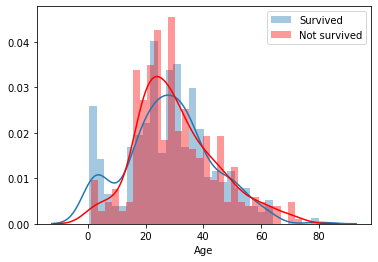

In [58]:
sns.distplot(data_Train[data_Train['Survived']==1]['Age'],bins=30,label='Survived')
sns.distplot(data_Train[data_Train['Survived']==0]['Age'],bins=30,color='red',label='Not survived')
plt.legend()


the distribution of the survived and not survived seems almost similar 

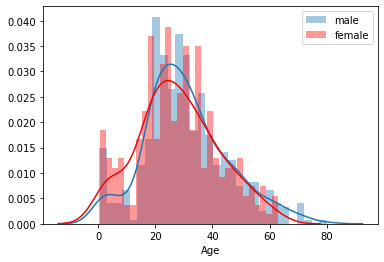

In [59]:
sns.distplot(data_Train[data_Train['Sex']=='male']['Age'],bins=30,label='male')
sns.distplot(data_Train[data_Train['Sex']=='female']['Age'],bins=30,color='red',label='female')
plt.legend()


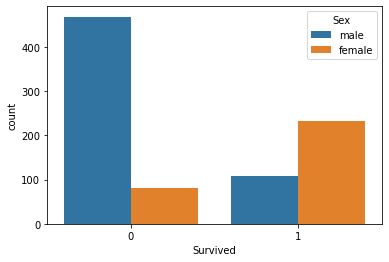

In [60]:
sns.countplot(data_Train['Survived'],hue=data_Train['Sex'])

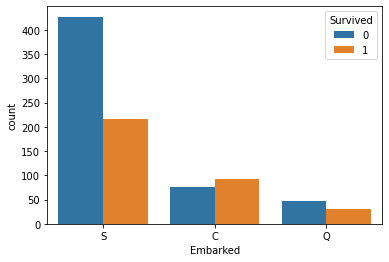

In [61]:
sns.countplot(data_Train['Embarked'],hue=data_Train['Survived'])

Female seems to have higher chances of survival then the male 

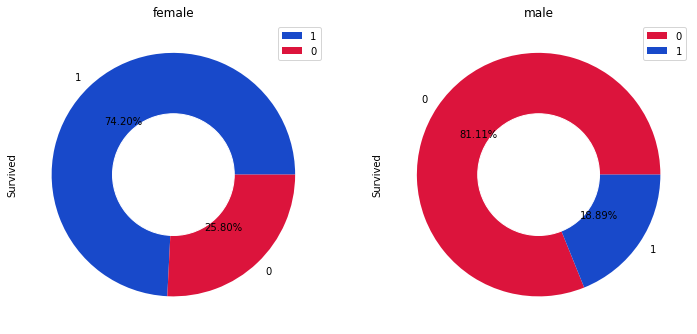

In [62]:

plt.subplot(121)
plt.title('female')
circle = plt.Circle((0, 0), 0.5, color = 'white')
data_Train[data_Train['Sex']=='female']['Survived'].value_counts().plot(kind='pie',figsize=(12, 12), rot=1, colors=[ '#1849CA','crimson'], autopct = '%.2f%%')
plots = plt.gcf()
plots.gca().add_artist(circle)
plt.legend()

plt.subplot(122)
plt.title('male')
circle = plt.Circle((0, 0), 0.5, color = 'white')
data_Train[data_Train['Sex']=='male']['Survived'].value_counts().plot(kind='pie',figsize=(12, 12), rot=1, colors=['crimson','#1849CA'], autopct = '%.2f%%')
plots = plt.gcf()
plots.gca().add_artist(circle)
plt.legend()

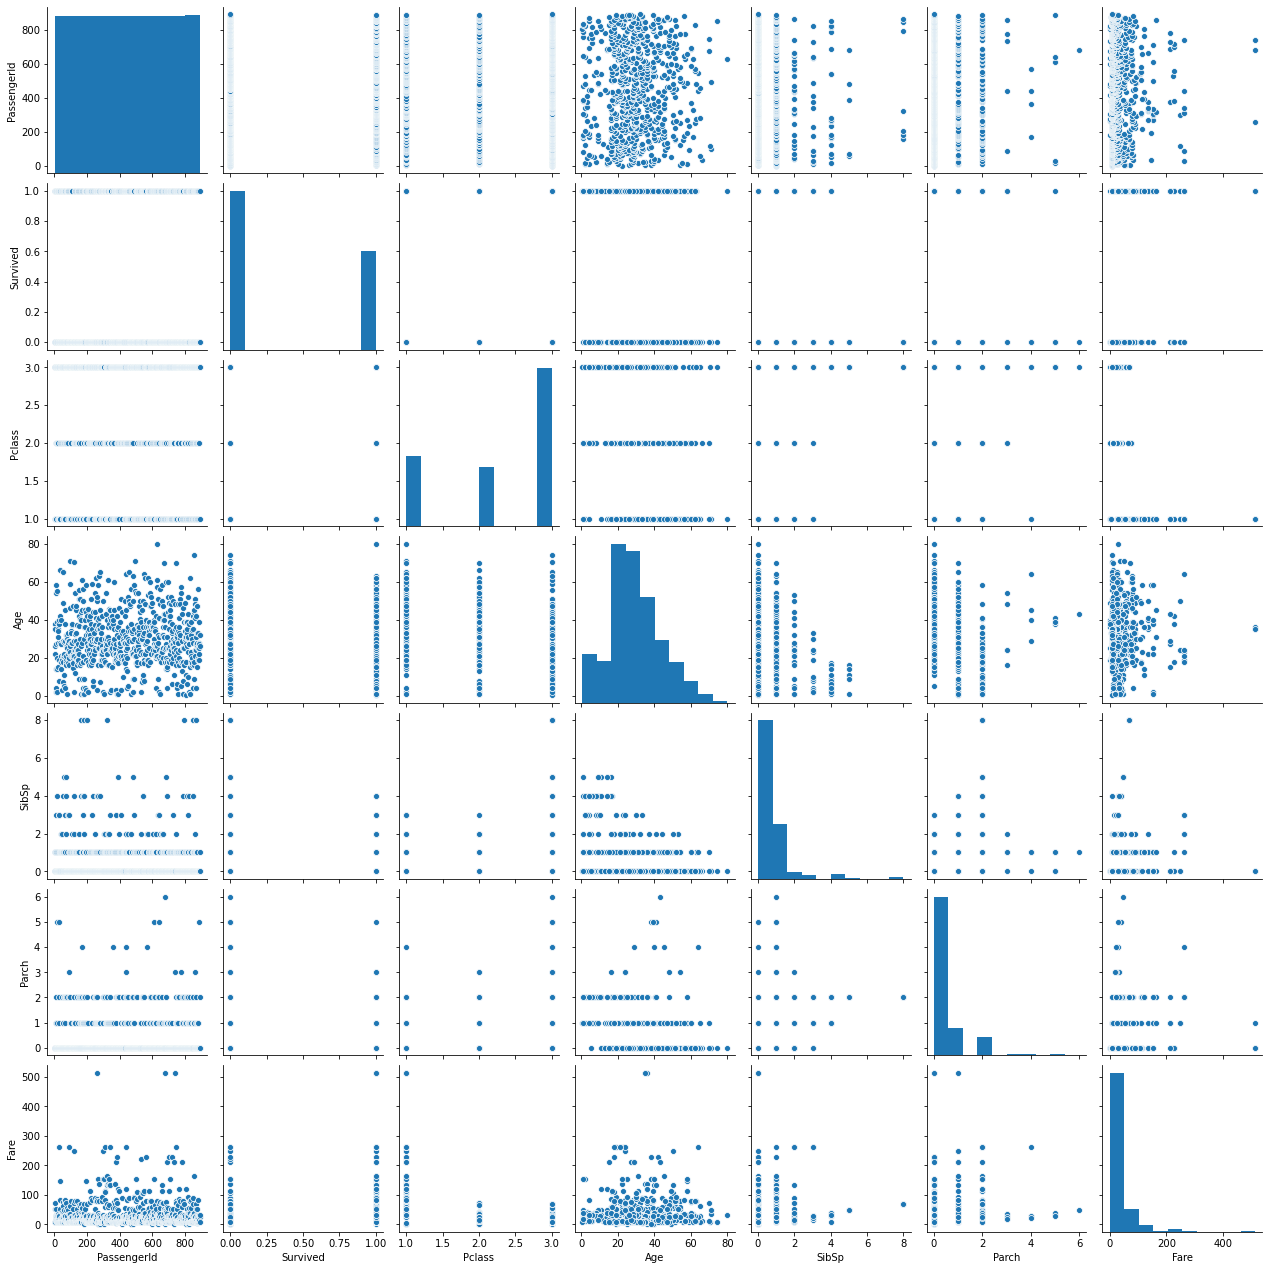

In [63]:
sns.pairplot(data_Train)

#feature selection
* converting the classifier data into numerical

In [64]:
data_Train['Sex'].replace(['male','female'],[1,0],inplace=True)
data_Test['Sex'].replace(['male','female'],[1,0],inplace=True)

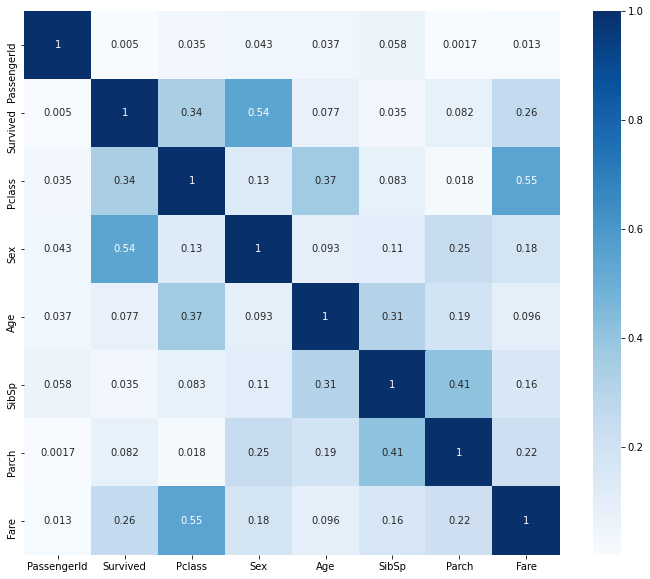

In [65]:
plt.subplots(figsize=(12, 10))
sns.heatmap(data_Train.corr().abs(),annot=True,cmap='Blues')

Replacing the two nan to S for embarked 

In [66]:
data_Train['Embarked'].fillna("S", inplace = True) 
data_Train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

features 

In [67]:
data_Train['Family']=data_Train['SibSp']+data_Train['Parch']+1
data_Test['Family']=data_Test['SibSp']+data_Test['Parch']+1

data_Train['Title']=data_Train['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
data_Test['Title']=data_Test['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
print(data_Train['Title'].value_counts())
title=['Mr','Miss','Mrs','Master']
print(title)
data_Train['Title'] = np.where(data_Train['Title'].isin(title), data_Train['Title'], 'Other')
data_Test['Title'] = np.where(data_Test['Title'].isin(title), data_Test['Title'], 'Other')
data_Train['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Sir               1
Lady              1
Capt              1
Jonkheer          1
the Countess      1
Ms                1
Don               1
Mme               1
Name: Title, dtype: int64
['Mr', 'Miss', 'Mrs', 'Master']


Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: Title, dtype: int64

In [68]:
data_Train=pd.get_dummies(data_Train,columns=['Embarked'], prefix='embarked')
data_Test=pd.get_dummies(data_Test,columns=['Embarked'],prefix='embarked')
data_Train=pd.get_dummies(data_Train,columns=['Title'], prefix='Title')
data_Test=pd.get_dummies(data_Test,columns=['Title'],prefix='Title')
data_Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Family,embarked_C,embarked_Q,embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,0,0,1,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,2,1,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,1,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,0,0,1,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1,0,0,1,0,0,1,0,0


In [69]:
data_Train.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)
data_Test.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

Lets replace the missing value in age with the mean values

In [70]:

imp_mean=SimpleImputer(missing_values=np.nan,strategy='median')
imp_mean.fit(data_Train[['Age']])
data_Train['Age']=imp_mean.transform(data_Train[['Age']])
data_Test['Age']=imp_mean.transform(data_Test[['Age']])
imp_mean.fit(data_Test[['Fare']])
data_Test['Fare']=imp_mean.transform(data_Test[['Fare']])

In [71]:
Y_Train=data_Train['Survived']
X_Train=data_Train.drop(['Survived'],axis=1)
print(X_Train.head())
print(data_Test.head())

   Pclass  Sex   Age  SibSp  Parch     Fare  Family  embarked_C  embarked_Q  \
0       3    1  22.0      1      0   7.2500       2           0           0   
1       1    0  38.0      1      0  71.2833       2           1           0   
2       3    0  26.0      0      0   7.9250       1           0           0   
3       1    0  35.0      1      0  53.1000       2           0           0   
4       3    1  35.0      0      0   8.0500       1           0           0   

   embarked_S  Title_Master  Title_Miss  Title_Mr  Title_Mrs  Title_Other  
0           1             0           0         1          0            0  
1           0             0           0         0          1            0  
2           1             0           1         0          0            0  
3           1             0           0         0          1            0  
4           1             0           0         1          0            0  
   Pclass  Sex   Age  SibSp  Parch     Fare  Family  embarked_C  emba

In [72]:

scaler=StandardScaler()
scaler.fit(X_Train)
X_Train=scaler.transform(X_Train)
X_Test=scaler.transform(data_Test)

In [73]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,make_scorer
X_train,X_test,Y_train,Y_test=train_test_split(X_Train,Y_Train,test_size=0.2, random_state=45)

In [74]:
print('Positive cases % in validation set: ', round(100 * len(Y_test[Y_test == 1]) / len(Y_test), 3), '%')
print('Positive cases % in train set: ', round(100 * len(Y_train[Y_train == 1]) / len(Y_train), 3), '%')

Positive cases % in validation set:  34.637 %
Positive cases % in train set:  39.326 %


#SVC model 

0.8272136314389836


0.8125

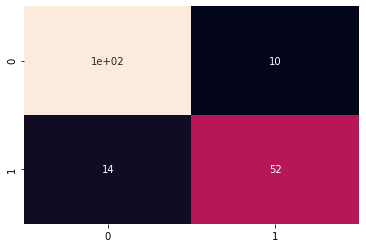

In [75]:
support=SVC()
support.fit(X_train,Y_train)
pred=support.predict(X_test)
accuracy = cross_val_score(support, X_train, Y_train, scoring='accuracy', cv = 5)
print(accuracy.mean())
sns.heatmap(confusion_matrix(pred,Y_test),annot=True,cbar=False)
f1_score(pred,Y_test)

0.8062015503875968
0.813148823007978


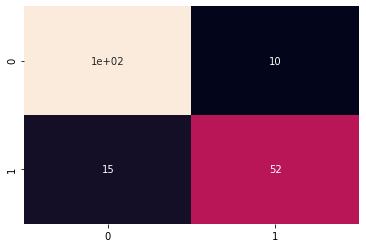

In [76]:
support1=SVC(C=1,kernel='poly',degree=3,gamma=.05)
support1.fit(X_train,Y_train)
pred=support1.predict(X_test)
print(f1_score(pred,Y_test))
accuracy = cross_val_score(support1, X_train, Y_train, scoring='accuracy', cv = 5)
print(accuracy.mean())
sns.heatmap(confusion_matrix(pred,Y_test),annot=True,cbar=False)


In [77]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import StratifiedKFold
str=StratifiedKFold(n_splits=4, shuffle = True, random_state = 999)
param_grid = {'C': [0.1, 1,5, 10, 100, ],  
              'gamma': [1, 0.1, 0.01,.05 ,0.001 ], 
              'kernel': ['rbf','linear','poly'],'degree':[2,3,4]}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,cv=str) 
grid.fit(X_train, Y_train) 
print(grid.best_params_) 
print(grid.best_estimator_) 

Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[CV] C=0.1, degree=2, gamma=1, kernel=rbf ............................
[CV]  C=0.1, degree=2, gamma=1, kernel=rbf, score=0.650, total=   0.0s
[CV] C=0.1, degree=2, gamma=1, kernel=rbf ............................
[CV]  C=0.1, degree=2, gamma=1, kernel=rbf, score=0.657, total=   0.0s
[CV] C=0.1, degree=2, gamma=1, kernel=rbf ............................
[CV]  C=0.1, degree=2, gamma=1, kernel=rbf, score=0.655, total=   0.0s
[CV] C=0.1, degree=2, gamma=1, kernel=rbf ............................
[CV]  C=0.1, degree=2, gamma=1, kernel=rbf, score=0.634, total=   0.0s
[CV] C=0.1, degree=2, gamma=1, kernel=rbf ............................
[CV]  C=0.1, degree=2, gamma=1, kernel=rbf, score=0.627, total=   0.0s
[CV] C=0.1, degree=2, gamma=1, kernel=linear .........................
[CV]  C=0.1, degree=2, gamma=1, kernel=linear, score=0.811, total=   0.0s
[CV] C=0.1, degree=2, gamma=1, kernel=linear .........................
[CV]  C=0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.1, degree=2, gamma=1, kernel=poly, score=0.825, total=   0.0s
[CV] C=0.1, degree=2, gamma=1, kernel=poly ...........................
[CV]  C=0.1, degree=2, gamma=1, kernel=poly, score=0.796, total=   0.0s
[CV] C=0.1, degree=2, gamma=1, kernel=poly ...........................
[CV]  C=0.1, degree=2, gamma=1, kernel=poly, score=0.789, total=   0.0s
[CV] C=0.1, degree=2, gamma=1, kernel=poly ...........................
[CV]  C=0.1, degree=2, gamma=1, kernel=poly, score=0.803, total=   0.0s
[CV] C=0.1, degree=2, gamma=0.1, kernel=rbf ..........................
[CV]  C=0.1, degree=2, gamma=0.1, kernel=rbf, score=0.832, total=   0.0s
[CV] C=0.1, degree=2, gamma=0.1, kernel=rbf ..........................
[CV]  C=0.1, degree=2, gamma=0.1, kernel=rbf, score=0.832, total=   0.0s
[CV] C=0.1, degree=2, gamma=0.1, kernel=rbf ..........................
[CV]  C=0.1, degree=2, gamma=0.1, kernel=rbf, score=0.768, total=   0.0s
[CV] C=0.1, degree=2, gamma=0.1, kernel=rbf .......................

[CV]  C=0.1, degree=3, gamma=1, kernel=rbf, score=0.627, total=   0.0s
[CV] C=0.1, degree=3, gamma=1, kernel=linear .........................
[CV]  C=0.1, degree=3, gamma=1, kernel=linear, score=0.811, total=   0.0s
[CV] C=0.1, degree=3, gamma=1, kernel=linear .........................
[CV]  C=0.1, degree=3, gamma=1, kernel=linear, score=0.825, total=   0.0s
[CV] C=0.1, degree=3, gamma=1, kernel=linear .........................
[CV]  C=0.1, degree=3, gamma=1, kernel=linear, score=0.789, total=   0.0s
[CV] C=0.1, degree=3, gamma=1, kernel=linear .........................
[CV]  C=0.1, degree=3, gamma=1, kernel=linear, score=0.810, total=   0.0s
[CV] C=0.1, degree=3, gamma=1, kernel=linear .........................
[CV]  C=0.1, degree=3, gamma=1, kernel=linear, score=0.824, total=   0.0s
[CV] C=0.1, degree=3, gamma=1, kernel=poly ...........................
[CV]  C=0.1, degree=3, gamma=1, kernel=poly, score=0.811, total=   0.1s
[CV] C=0.1, degree=3, gamma=1, kernel=poly ..................

[CV]  C=0.1, degree=3, gamma=0.001, kernel=rbf, score=0.606, total=   0.0s
[CV] C=0.1, degree=3, gamma=0.001, kernel=linear .....................
[CV]  C=0.1, degree=3, gamma=0.001, kernel=linear, score=0.811, total=   0.0s
[CV] C=0.1, degree=3, gamma=0.001, kernel=linear .....................
[CV]  C=0.1, degree=3, gamma=0.001, kernel=linear, score=0.825, total=   0.0s
[CV] C=0.1, degree=3, gamma=0.001, kernel=linear .....................
[CV]  C=0.1, degree=3, gamma=0.001, kernel=linear, score=0.789, total=   0.0s
[CV] C=0.1, degree=3, gamma=0.001, kernel=linear .....................
[CV]  C=0.1, degree=3, gamma=0.001, kernel=linear, score=0.810, total=   0.0s
[CV] C=0.1, degree=3, gamma=0.001, kernel=linear .....................
[CV]  C=0.1, degree=3, gamma=0.001, kernel=linear, score=0.824, total=   0.0s
[CV] C=0.1, degree=3, gamma=0.001, kernel=poly .......................
[CV]  C=0.1, degree=3, gamma=0.001, kernel=poly, score=0.608, total=   0.0s
[CV] C=0.1, degree=3, gamma=0.001

[CV]  C=0.1, degree=4, gamma=0.05, kernel=poly, score=0.697, total=   0.0s
[CV] C=0.1, degree=4, gamma=0.05, kernel=poly ........................
[CV]  C=0.1, degree=4, gamma=0.05, kernel=poly, score=0.690, total=   0.0s
[CV] C=0.1, degree=4, gamma=0.05, kernel=poly ........................
[CV]  C=0.1, degree=4, gamma=0.05, kernel=poly, score=0.697, total=   0.0s
[CV] C=0.1, degree=4, gamma=0.001, kernel=rbf ........................
[CV]  C=0.1, degree=4, gamma=0.001, kernel=rbf, score=0.608, total=   0.0s
[CV] C=0.1, degree=4, gamma=0.001, kernel=rbf ........................
[CV]  C=0.1, degree=4, gamma=0.001, kernel=rbf, score=0.608, total=   0.0s
[CV] C=0.1, degree=4, gamma=0.001, kernel=rbf ........................
[CV]  C=0.1, degree=4, gamma=0.001, kernel=rbf, score=0.606, total=   0.0s
[CV] C=0.1, degree=4, gamma=0.001, kernel=rbf ........................
[CV]  C=0.1, degree=4, gamma=0.001, kernel=rbf, score=0.606, total=   0.0s
[CV] C=0.1, degree=4, gamma=0.001, kernel=rbf ...

[CV]  C=1, degree=2, gamma=0.01, kernel=poly, score=0.606, total=   0.0s
[CV] C=1, degree=2, gamma=0.01, kernel=poly ..........................
[CV]  C=1, degree=2, gamma=0.01, kernel=poly, score=0.613, total=   0.0s
[CV] C=1, degree=2, gamma=0.05, kernel=rbf ...........................
[CV]  C=1, degree=2, gamma=0.05, kernel=rbf, score=0.846, total=   0.0s
[CV] C=1, degree=2, gamma=0.05, kernel=rbf ...........................
[CV]  C=1, degree=2, gamma=0.05, kernel=rbf, score=0.839, total=   0.0s
[CV] C=1, degree=2, gamma=0.05, kernel=rbf ...........................
[CV]  C=1, degree=2, gamma=0.05, kernel=rbf, score=0.803, total=   0.0s
[CV] C=1, degree=2, gamma=0.05, kernel=rbf ...........................
[CV]  C=1, degree=2, gamma=0.05, kernel=rbf, score=0.803, total=   0.0s
[CV] C=1, degree=2, gamma=0.05, kernel=rbf ...........................
[CV]  C=1, degree=2, gamma=0.05, kernel=rbf, score=0.845, total=   0.0s
[CV] C=1, degree=2, gamma=0.05, kernel=linear ......................

[CV]  C=1, degree=3, gamma=0.01, kernel=linear, score=0.825, total=   0.0s
[CV] C=1, degree=3, gamma=0.01, kernel=linear ........................
[CV]  C=1, degree=3, gamma=0.01, kernel=linear, score=0.789, total=   0.0s
[CV] C=1, degree=3, gamma=0.01, kernel=linear ........................
[CV]  C=1, degree=3, gamma=0.01, kernel=linear, score=0.810, total=   0.0s
[CV] C=1, degree=3, gamma=0.01, kernel=linear ........................
[CV]  C=1, degree=3, gamma=0.01, kernel=linear, score=0.824, total=   0.0s
[CV] C=1, degree=3, gamma=0.01, kernel=poly ..........................
[CV]  C=1, degree=3, gamma=0.01, kernel=poly, score=0.615, total=   0.0s
[CV] C=1, degree=3, gamma=0.01, kernel=poly ..........................
[CV]  C=1, degree=3, gamma=0.01, kernel=poly, score=0.608, total=   0.0s
[CV] C=1, degree=3, gamma=0.01, kernel=poly ..........................
[CV]  C=1, degree=3, gamma=0.01, kernel=poly, score=0.613, total=   0.0s
[CV] C=1, degree=3, gamma=0.01, kernel=poly ...........

[CV]  C=1, degree=4, gamma=0.1, kernel=poly, score=0.783, total=   0.0s
[CV] C=1, degree=4, gamma=0.1, kernel=poly ...........................
[CV]  C=1, degree=4, gamma=0.1, kernel=poly, score=0.832, total=   0.0s
[CV] C=1, degree=4, gamma=0.1, kernel=poly ...........................
[CV]  C=1, degree=4, gamma=0.1, kernel=poly, score=0.768, total=   0.0s
[CV] C=1, degree=4, gamma=0.1, kernel=poly ...........................
[CV]  C=1, degree=4, gamma=0.1, kernel=poly, score=0.768, total=   0.0s
[CV] C=1, degree=4, gamma=0.1, kernel=poly ...........................
[CV]  C=1, degree=4, gamma=0.1, kernel=poly, score=0.761, total=   0.0s
[CV] C=1, degree=4, gamma=0.01, kernel=rbf ...........................
[CV]  C=1, degree=4, gamma=0.01, kernel=rbf, score=0.804, total=   0.0s
[CV] C=1, degree=4, gamma=0.01, kernel=rbf ...........................
[CV]  C=1, degree=4, gamma=0.01, kernel=rbf, score=0.825, total=   0.0s
[CV] C=1, degree=4, gamma=0.01, kernel=rbf ...........................

[CV]  C=5, degree=2, gamma=1, kernel=linear, score=0.789, total=   0.0s
[CV] C=5, degree=2, gamma=1, kernel=linear ...........................
[CV]  C=5, degree=2, gamma=1, kernel=linear, score=0.803, total=   0.0s
[CV] C=5, degree=2, gamma=1, kernel=linear ...........................
[CV]  C=5, degree=2, gamma=1, kernel=linear, score=0.824, total=   0.1s
[CV] C=5, degree=2, gamma=1, kernel=poly .............................
[CV] . C=5, degree=2, gamma=1, kernel=poly, score=0.797, total=   1.0s
[CV] C=5, degree=2, gamma=1, kernel=poly .............................
[CV] . C=5, degree=2, gamma=1, kernel=poly, score=0.790, total=   0.7s
[CV] C=5, degree=2, gamma=1, kernel=poly .............................
[CV] . C=5, degree=2, gamma=1, kernel=poly, score=0.775, total=   1.2s
[CV] C=5, degree=2, gamma=1, kernel=poly .............................
[CV] . C=5, degree=2, gamma=1, kernel=poly, score=0.768, total=   0.9s
[CV] C=5, degree=2, gamma=1, kernel=poly .............................
[CV

[CV]  C=5, degree=2, gamma=0.001, kernel=rbf, score=0.810, total=   0.0s
[CV] C=5, degree=2, gamma=0.001, kernel=linear .......................
[CV]  C=5, degree=2, gamma=0.001, kernel=linear, score=0.832, total=   0.0s
[CV] C=5, degree=2, gamma=0.001, kernel=linear .......................
[CV]  C=5, degree=2, gamma=0.001, kernel=linear, score=0.825, total=   0.1s
[CV] C=5, degree=2, gamma=0.001, kernel=linear .......................
[CV]  C=5, degree=2, gamma=0.001, kernel=linear, score=0.789, total=   0.0s
[CV] C=5, degree=2, gamma=0.001, kernel=linear .......................
[CV]  C=5, degree=2, gamma=0.001, kernel=linear, score=0.803, total=   0.0s
[CV] C=5, degree=2, gamma=0.001, kernel=linear .......................
[CV]  C=5, degree=2, gamma=0.001, kernel=linear, score=0.824, total=   0.1s
[CV] C=5, degree=2, gamma=0.001, kernel=poly .........................
[CV]  C=5, degree=2, gamma=0.001, kernel=poly, score=0.608, total=   0.0s
[CV] C=5, degree=2, gamma=0.001, kernel=poly ..

[CV]  C=5, degree=3, gamma=0.05, kernel=rbf, score=0.803, total=   0.0s
[CV] C=5, degree=3, gamma=0.05, kernel=rbf ...........................
[CV]  C=5, degree=3, gamma=0.05, kernel=rbf, score=0.810, total=   0.0s
[CV] C=5, degree=3, gamma=0.05, kernel=rbf ...........................
[CV]  C=5, degree=3, gamma=0.05, kernel=rbf, score=0.810, total=   0.0s
[CV] C=5, degree=3, gamma=0.05, kernel=linear ........................
[CV]  C=5, degree=3, gamma=0.05, kernel=linear, score=0.832, total=   0.0s
[CV] C=5, degree=3, gamma=0.05, kernel=linear ........................
[CV]  C=5, degree=3, gamma=0.05, kernel=linear, score=0.825, total=   0.1s
[CV] C=5, degree=3, gamma=0.05, kernel=linear ........................
[CV]  C=5, degree=3, gamma=0.05, kernel=linear, score=0.789, total=   0.0s
[CV] C=5, degree=3, gamma=0.05, kernel=linear ........................
[CV]  C=5, degree=3, gamma=0.05, kernel=linear, score=0.803, total=   0.0s
[CV] C=5, degree=3, gamma=0.05, kernel=linear ............

[CV]  C=5, degree=4, gamma=0.01, kernel=rbf, score=0.846, total=   0.0s
[CV] C=5, degree=4, gamma=0.01, kernel=rbf ...........................
[CV]  C=5, degree=4, gamma=0.01, kernel=rbf, score=0.839, total=   0.0s
[CV] C=5, degree=4, gamma=0.01, kernel=rbf ...........................
[CV]  C=5, degree=4, gamma=0.01, kernel=rbf, score=0.796, total=   0.0s
[CV] C=5, degree=4, gamma=0.01, kernel=rbf ...........................
[CV]  C=5, degree=4, gamma=0.01, kernel=rbf, score=0.803, total=   0.0s
[CV] C=5, degree=4, gamma=0.01, kernel=rbf ...........................
[CV]  C=5, degree=4, gamma=0.01, kernel=rbf, score=0.831, total=   0.0s
[CV] C=5, degree=4, gamma=0.01, kernel=linear ........................
[CV]  C=5, degree=4, gamma=0.01, kernel=linear, score=0.832, total=   0.0s
[CV] C=5, degree=4, gamma=0.01, kernel=linear ........................
[CV]  C=5, degree=4, gamma=0.01, kernel=linear, score=0.825, total=   0.1s
[CV] C=5, degree=4, gamma=0.01, kernel=linear ..................

[CV]  C=10, degree=2, gamma=1, kernel=poly, score=0.775, total=   1.2s
[CV] C=10, degree=2, gamma=1, kernel=poly ............................
[CV]  C=10, degree=2, gamma=1, kernel=poly, score=0.768, total=   1.7s
[CV] C=10, degree=2, gamma=1, kernel=poly ............................
[CV]  C=10, degree=2, gamma=1, kernel=poly, score=0.768, total=   2.4s
[CV] C=10, degree=2, gamma=0.1, kernel=rbf ...........................
[CV]  C=10, degree=2, gamma=0.1, kernel=rbf, score=0.839, total=   0.0s
[CV] C=10, degree=2, gamma=0.1, kernel=rbf ...........................
[CV]  C=10, degree=2, gamma=0.1, kernel=rbf, score=0.818, total=   0.0s
[CV] C=10, degree=2, gamma=0.1, kernel=rbf ...........................
[CV]  C=10, degree=2, gamma=0.1, kernel=rbf, score=0.768, total=   0.0s
[CV] C=10, degree=2, gamma=0.1, kernel=rbf ...........................
[CV]  C=10, degree=2, gamma=0.1, kernel=rbf, score=0.775, total=   0.0s
[CV] C=10, degree=2, gamma=0.1, kernel=rbf ...........................
[C

[CV]  C=10, degree=2, gamma=0.001, kernel=linear, score=0.824, total=   0.1s
[CV] C=10, degree=2, gamma=0.001, kernel=poly ........................
[CV]  C=10, degree=2, gamma=0.001, kernel=poly, score=0.608, total=   0.0s
[CV] C=10, degree=2, gamma=0.001, kernel=poly ........................
[CV]  C=10, degree=2, gamma=0.001, kernel=poly, score=0.608, total=   0.0s
[CV] C=10, degree=2, gamma=0.001, kernel=poly ........................
[CV]  C=10, degree=2, gamma=0.001, kernel=poly, score=0.606, total=   0.0s
[CV] C=10, degree=2, gamma=0.001, kernel=poly ........................
[CV]  C=10, degree=2, gamma=0.001, kernel=poly, score=0.606, total=   0.0s
[CV] C=10, degree=2, gamma=0.001, kernel=poly ........................
[CV]  C=10, degree=2, gamma=0.001, kernel=poly, score=0.606, total=   0.0s
[CV] C=10, degree=3, gamma=1, kernel=rbf .............................
[CV] . C=10, degree=3, gamma=1, kernel=rbf, score=0.818, total=   0.0s
[CV] C=10, degree=3, gamma=1, kernel=rbf ..........

[CV]  C=10, degree=3, gamma=0.05, kernel=linear, score=0.825, total=   0.1s
[CV] C=10, degree=3, gamma=0.05, kernel=linear .......................
[CV]  C=10, degree=3, gamma=0.05, kernel=linear, score=0.789, total=   0.1s
[CV] C=10, degree=3, gamma=0.05, kernel=linear .......................
[CV]  C=10, degree=3, gamma=0.05, kernel=linear, score=0.810, total=   0.0s
[CV] C=10, degree=3, gamma=0.05, kernel=linear .......................
[CV]  C=10, degree=3, gamma=0.05, kernel=linear, score=0.824, total=   0.1s
[CV] C=10, degree=3, gamma=0.05, kernel=poly .........................
[CV]  C=10, degree=3, gamma=0.05, kernel=poly, score=0.811, total=   0.0s
[CV] C=10, degree=3, gamma=0.05, kernel=poly .........................
[CV]  C=10, degree=3, gamma=0.05, kernel=poly, score=0.839, total=   0.0s
[CV] C=10, degree=3, gamma=0.05, kernel=poly .........................
[CV]  C=10, degree=3, gamma=0.05, kernel=poly, score=0.775, total=   0.0s
[CV] C=10, degree=3, gamma=0.05, kernel=poly ...

[CV]  C=10, degree=4, gamma=0.01, kernel=rbf, score=0.803, total=   0.0s
[CV] C=10, degree=4, gamma=0.01, kernel=rbf ..........................
[CV]  C=10, degree=4, gamma=0.01, kernel=rbf, score=0.831, total=   0.0s
[CV] C=10, degree=4, gamma=0.01, kernel=linear .......................
[CV]  C=10, degree=4, gamma=0.01, kernel=linear, score=0.832, total=   0.1s
[CV] C=10, degree=4, gamma=0.01, kernel=linear .......................
[CV]  C=10, degree=4, gamma=0.01, kernel=linear, score=0.825, total=   0.1s
[CV] C=10, degree=4, gamma=0.01, kernel=linear .......................
[CV]  C=10, degree=4, gamma=0.01, kernel=linear, score=0.789, total=   0.1s
[CV] C=10, degree=4, gamma=0.01, kernel=linear .......................
[CV]  C=10, degree=4, gamma=0.01, kernel=linear, score=0.810, total=   0.1s
[CV] C=10, degree=4, gamma=0.01, kernel=linear .......................
[CV]  C=10, degree=4, gamma=0.01, kernel=linear, score=0.824, total=   0.1s
[CV] C=10, degree=4, gamma=0.01, kernel=poly ...

[CV]  C=100, degree=2, gamma=0.1, kernel=linear, score=0.832, total=   0.4s
[CV] C=100, degree=2, gamma=0.1, kernel=linear .......................
[CV]  C=100, degree=2, gamma=0.1, kernel=linear, score=0.825, total=   0.5s
[CV] C=100, degree=2, gamma=0.1, kernel=linear .......................
[CV]  C=100, degree=2, gamma=0.1, kernel=linear, score=0.796, total=   0.4s
[CV] C=100, degree=2, gamma=0.1, kernel=linear .......................
[CV]  C=100, degree=2, gamma=0.1, kernel=linear, score=0.803, total=   0.4s
[CV] C=100, degree=2, gamma=0.1, kernel=linear .......................
[CV]  C=100, degree=2, gamma=0.1, kernel=linear, score=0.824, total=   0.7s
[CV] C=100, degree=2, gamma=0.1, kernel=poly .........................
[CV]  C=100, degree=2, gamma=0.1, kernel=poly, score=0.804, total=   0.2s
[CV] C=100, degree=2, gamma=0.1, kernel=poly .........................
[CV]  C=100, degree=2, gamma=0.1, kernel=poly, score=0.804, total=   0.1s
[CV] C=100, degree=2, gamma=0.1, kernel=poly .

[CV]  C=100, degree=3, gamma=1, kernel=rbf, score=0.775, total=   0.0s
[CV] C=100, degree=3, gamma=1, kernel=rbf ............................
[CV]  C=100, degree=3, gamma=1, kernel=rbf, score=0.718, total=   0.0s
[CV] C=100, degree=3, gamma=1, kernel=linear .........................
[CV]  C=100, degree=3, gamma=1, kernel=linear, score=0.832, total=   0.4s
[CV] C=100, degree=3, gamma=1, kernel=linear .........................
[CV]  C=100, degree=3, gamma=1, kernel=linear, score=0.825, total=   0.5s
[CV] C=100, degree=3, gamma=1, kernel=linear .........................
[CV]  C=100, degree=3, gamma=1, kernel=linear, score=0.796, total=   0.4s
[CV] C=100, degree=3, gamma=1, kernel=linear .........................
[CV]  C=100, degree=3, gamma=1, kernel=linear, score=0.803, total=   0.4s
[CV] C=100, degree=3, gamma=1, kernel=linear .........................
[CV]  C=100, degree=3, gamma=1, kernel=linear, score=0.824, total=   0.7s
[CV] C=100, degree=3, gamma=1, kernel=poly ...................

[CV]  C=100, degree=3, gamma=0.001, kernel=rbf, score=0.817, total=   0.0s
[CV] C=100, degree=3, gamma=0.001, kernel=rbf ........................
[CV]  C=100, degree=3, gamma=0.001, kernel=rbf, score=0.831, total=   0.0s
[CV] C=100, degree=3, gamma=0.001, kernel=linear .....................
[CV]  C=100, degree=3, gamma=0.001, kernel=linear, score=0.832, total=   0.4s
[CV] C=100, degree=3, gamma=0.001, kernel=linear .....................
[CV]  C=100, degree=3, gamma=0.001, kernel=linear, score=0.825, total=   0.5s
[CV] C=100, degree=3, gamma=0.001, kernel=linear .....................
[CV]  C=100, degree=3, gamma=0.001, kernel=linear, score=0.796, total=   0.4s
[CV] C=100, degree=3, gamma=0.001, kernel=linear .....................
[CV]  C=100, degree=3, gamma=0.001, kernel=linear, score=0.803, total=   0.4s
[CV] C=100, degree=3, gamma=0.001, kernel=linear .....................
[CV]  C=100, degree=3, gamma=0.001, kernel=linear, score=0.824, total=   0.7s
[CV] C=100, degree=3, gamma=0.001,

[CV]  C=100, degree=4, gamma=0.05, kernel=rbf, score=0.754, total=   0.0s
[CV] C=100, degree=4, gamma=0.05, kernel=linear ......................
[CV]  C=100, degree=4, gamma=0.05, kernel=linear, score=0.832, total=   0.4s
[CV] C=100, degree=4, gamma=0.05, kernel=linear ......................
[CV]  C=100, degree=4, gamma=0.05, kernel=linear, score=0.825, total=   0.5s
[CV] C=100, degree=4, gamma=0.05, kernel=linear ......................
[CV]  C=100, degree=4, gamma=0.05, kernel=linear, score=0.796, total=   0.4s
[CV] C=100, degree=4, gamma=0.05, kernel=linear ......................
[CV]  C=100, degree=4, gamma=0.05, kernel=linear, score=0.803, total=   0.4s
[CV] C=100, degree=4, gamma=0.05, kernel=linear ......................
[CV]  C=100, degree=4, gamma=0.05, kernel=linear, score=0.824, total=   0.7s
[CV] C=100, degree=4, gamma=0.05, kernel=poly ........................
[CV]  C=100, degree=4, gamma=0.05, kernel=poly, score=0.797, total=   0.0s
[CV] C=100, degree=4, gamma=0.05, kernel

[Parallel(n_jobs=1)]: Done 1125 out of 1125 | elapsed:  9.9min finished


In [78]:
pred1=support1.predict(X_Test)

In [79]:
file='../input/titanic/gender_submission.csv'
submission=pd.read_csv(file)
submission['Survived']=pred1
submission[submission['Survived']==0].count()


PassengerId    256
Survived       256
dtype: int64

In [80]:
#submission.to_csv('submission2.csv', index=False, encoding='utf-8')

#RandomForestClassifier

In [81]:
from sklearn.model_selection import GridSearchCV  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
str=StratifiedKFold(n_splits=4, shuffle = True, random_state = 999)
rfc=RandomForestClassifier()
parameters={'n_estimators':[100,300,400,500,1000],'max_features':['auto','sqrt','log2'],
            'max_depth':[3,4,5,6,8],'criterion':['gini']}
CV_r = GridSearchCV(estimator=rfc, param_grid=parameters, cv= str,verbose=3)
CV_r.fit(X_Train, Y_Train)
print(CV_r.best_params_) 
print(CV_r.best_estimator_) 

Fitting 4 folds for each of 75 candidates, totalling 300 fits
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=100, score=0.803, total=   0.3s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=100, score=0.830, total=   0.3s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=100 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=100, score=0.843, total=   0.3s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=100, score=0.824, total=   0.2s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=300 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=300, score=0.803, total=   0.8s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=300 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=300, score=0.830, total=   0.7s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=300 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=300, score=0.834, total=   0.7s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=300 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=300, score=0.815, total=   0.8s
[CV] criterion=gini, max_depth=3, max_features=auto

[CV]  criterion=gini, max_depth=3, max_features=log2, n_estimators=400, score=0.815, total=   0.9s
[CV] criterion=gini, max_depth=3, max_features=log2, n_estimators=500 
[CV]  criterion=gini, max_depth=3, max_features=log2, n_estimators=500, score=0.803, total=   1.4s
[CV] criterion=gini, max_depth=3, max_features=log2, n_estimators=500 
[CV]  criterion=gini, max_depth=3, max_features=log2, n_estimators=500, score=0.843, total=   1.2s
[CV] criterion=gini, max_depth=3, max_features=log2, n_estimators=500 
[CV]  criterion=gini, max_depth=3, max_features=log2, n_estimators=500, score=0.839, total=   1.2s
[CV] criterion=gini, max_depth=3, max_features=log2, n_estimators=500 
[CV]  criterion=gini, max_depth=3, max_features=log2, n_estimators=500, score=0.815, total=   1.2s
[CV] criterion=gini, max_depth=3, max_features=log2, n_estimators=1000 
[CV]  criterion=gini, max_depth=3, max_features=log2, n_estimators=1000, score=0.803, total=   2.3s
[CV] criterion=gini, max_depth=3, max_features=lo

[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=100, score=0.803, total=   0.2s
[CV] criterion=gini, max_depth=4, max_features=log2, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=100, score=0.861, total=   0.3s
[CV] criterion=gini, max_depth=4, max_features=log2, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=100, score=0.843, total=   0.3s
[CV] criterion=gini, max_depth=4, max_features=log2, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=100, score=0.829, total=   0.3s
[CV] criterion=gini, max_depth=4, max_features=log2, n_estimators=300 
[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=300, score=0.803, total=   0.8s
[CV] criterion=gini, max_depth=4, max_features=log2, n_estimators=300 
[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=300, score=0.852, total=   0.7s
[CV] criterion=gini, max_depth=4, max_features=log2

[CV]  criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, score=0.848, total=   1.0s
[CV] criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400 
[CV]  criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, score=0.848, total=   1.0s
[CV] criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400 
[CV]  criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, score=0.829, total=   1.0s
[CV] criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500 
[CV]  criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, score=0.803, total=   1.2s
[CV] criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500 
[CV]  criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, score=0.857, total=   1.2s
[CV] criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500 
[CV]  criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, score=0.843, total=   1.2s
[CV] criterion=gini, max_depth=5, max_features=sqrt

[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=1000, score=0.848, total=   2.5s
[CV] criterion=gini, max_depth=6, max_features=auto, n_estimators=1000 
[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=1000, score=0.833, total=   2.5s
[CV] criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100 
[CV]  criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, score=0.803, total=   0.3s
[CV] criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100 
[CV]  criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, score=0.843, total=   0.3s
[CV] criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100 
[CV]  criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, score=0.843, total=   0.3s
[CV] criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100 
[CV]  criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, score=0.829, total=   0.3s
[CV] criterion=gini, max_depth=6, max_features=s

[CV]  criterion=gini, max_depth=8, max_features=auto, n_estimators=300, score=0.824, total=   0.8s
[CV] criterion=gini, max_depth=8, max_features=auto, n_estimators=400 
[CV]  criterion=gini, max_depth=8, max_features=auto, n_estimators=400, score=0.816, total=   1.1s
[CV] criterion=gini, max_depth=8, max_features=auto, n_estimators=400 
[CV]  criterion=gini, max_depth=8, max_features=auto, n_estimators=400, score=0.825, total=   1.1s
[CV] criterion=gini, max_depth=8, max_features=auto, n_estimators=400 
[CV]  criterion=gini, max_depth=8, max_features=auto, n_estimators=400, score=0.830, total=   1.1s
[CV] criterion=gini, max_depth=8, max_features=auto, n_estimators=400 
[CV]  criterion=gini, max_depth=8, max_features=auto, n_estimators=400, score=0.815, total=   1.1s
[CV] criterion=gini, max_depth=8, max_features=auto, n_estimators=500 
[CV]  criterion=gini, max_depth=8, max_features=auto, n_estimators=500, score=0.825, total=   1.3s
[CV] criterion=gini, max_depth=8, max_features=auto

[CV]  criterion=gini, max_depth=8, max_features=log2, n_estimators=1000, score=0.821, total=   2.6s
[CV] criterion=gini, max_depth=8, max_features=log2, n_estimators=1000 
[CV]  criterion=gini, max_depth=8, max_features=log2, n_estimators=1000, score=0.825, total=   2.5s
[CV] criterion=gini, max_depth=8, max_features=log2, n_estimators=1000 
[CV]  criterion=gini, max_depth=8, max_features=log2, n_estimators=1000, score=0.825, total=   2.5s
[CV] criterion=gini, max_depth=8, max_features=log2, n_estimators=1000 
[CV]  criterion=gini, max_depth=8, max_features=log2, n_estimators=1000, score=0.820, total=   2.6s


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  5.8min finished


{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100}
RandomForestClassifier(max_depth=5, max_features='sqrt')


0.7999999999999999
0.761624649859944


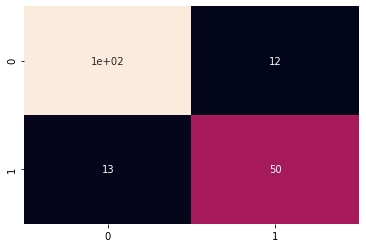

In [82]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 100, max_depth=4, criterion='gini')
rfc1.fit(X_train,Y_train)
pred=rfc1.predict(X_test)
print(f1_score(pred,Y_test))
accuracy = cross_val_score(rfc1, X_train, Y_train, scoring=make_scorer(f1_score), cv = 5)
print(accuracy.mean())
sns.heatmap(confusion_matrix(pred,Y_test),annot=True,cbar=False)

In [83]:
pred3=rfc1.predict(X_Test)

score in submission .786

In [84]:
file='../input/titanic/gender_submission.csv'
submission3=pd.read_csv(file)
submission3['Survived']=pred3
#submission3.to_csv('submission3.csv', index=False, encoding='utf-8')
submission3[submission3['Survived']==0].count()


PassengerId    257
Survived       257
dtype: int64

In [85]:
X_train.shape[1]
Train=X_train.copy()
Test=X_test.copy()

In [86]:
Train.shape
Y_train.head()
Y_t=Y_train.to_numpy()

#ANN

In [87]:
from keras import Sequential 
from keras.layers import Dense
model = Sequential()
model.add(Dense(17, input_dim=15, activation='relu'))
model.add(Dense(17, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(Train, Y_t, validation_data=(Test,Y_test) ,epochs=250)

Epoch 1/250
23/23 [==============================] - 0s 11ms/step - loss: 0.6925 - accuracy: 0.5548 - val_loss: 0.6204 - val_accuracy: 0.6257
Epoch 2/250
23/23 [==============================] - 0s 3ms/step - loss: 0.6332 - accuracy: 0.6461 - val_loss: 0.5628 - val_accuracy: 0.7933
Epoch 3/250
23/23 [==============================] - 0s 3ms/step - loss: 0.5882 - accuracy: 0.7022 - val_loss: 0.5201 - val_accuracy: 0.8045
Epoch 4/250
23/23 [==============================] - 0s 2ms/step - loss: 0.5533 - accuracy: 0.7514 - val_loss: 0.4871 - val_accuracy: 0.8492
Epoch 5/250
23/23 [==============================] - 0s 2ms/step - loss: 0.5217 - accuracy: 0.7767 - val_loss: 0.4561 - val_accuracy: 0.8492
Epoch 6/250
23/23 [==============================] - 0s 3ms/step - loss: 0.4963 - accuracy: 0.7879 - val_loss: 0.4267 - val_accuracy: 0.8436
Epoch 7/250
23/23 [==============================] - 0s 2ms/step - loss: 0.4747 - accuracy: 0.7992 - val_loss: 0.4052 - val_accuracy: 0.8324
Epoch 8/250


Epoch 59/250
23/23 [==============================] - 0s 2ms/step - loss: 0.3700 - accuracy: 0.8385 - val_loss: 0.3475 - val_accuracy: 0.8771
Epoch 60/250
23/23 [==============================] - 0s 2ms/step - loss: 0.3692 - accuracy: 0.8385 - val_loss: 0.3491 - val_accuracy: 0.8771
Epoch 61/250
23/23 [==============================] - 0s 2ms/step - loss: 0.3692 - accuracy: 0.8399 - val_loss: 0.3487 - val_accuracy: 0.8827
Epoch 62/250
23/23 [==============================] - 0s 2ms/step - loss: 0.3699 - accuracy: 0.8371 - val_loss: 0.3486 - val_accuracy: 0.8715
Epoch 63/250
23/23 [==============================] - 0s 2ms/step - loss: 0.3691 - accuracy: 0.8413 - val_loss: 0.3434 - val_accuracy: 0.8771
Epoch 64/250
23/23 [==============================] - 0s 2ms/step - loss: 0.3680 - accuracy: 0.8371 - val_loss: 0.3461 - val_accuracy: 0.8771
Epoch 65/250
23/23 [==============================] - 0s 2ms/step - loss: 0.3674 - accuracy: 0.8399 - val_loss: 0.3511 - val_accuracy: 0.8715
Epoch 

23/23 [==============================] - 0s 2ms/step - loss: 0.3465 - accuracy: 0.8497 - val_loss: 0.3482 - val_accuracy: 0.8771
Epoch 117/250
23/23 [==============================] - 0s 2ms/step - loss: 0.3458 - accuracy: 0.8539 - val_loss: 0.3512 - val_accuracy: 0.8827
Epoch 118/250
23/23 [==============================] - 0s 2ms/step - loss: 0.3456 - accuracy: 0.8525 - val_loss: 0.3490 - val_accuracy: 0.8771
Epoch 119/250
23/23 [==============================] - 0s 2ms/step - loss: 0.3452 - accuracy: 0.8497 - val_loss: 0.3560 - val_accuracy: 0.8603
Epoch 120/250
23/23 [==============================] - 0s 2ms/step - loss: 0.3467 - accuracy: 0.8539 - val_loss: 0.3479 - val_accuracy: 0.8771
Epoch 121/250
23/23 [==============================] - 0s 2ms/step - loss: 0.3451 - accuracy: 0.8553 - val_loss: 0.3470 - val_accuracy: 0.8827
Epoch 122/250
23/23 [==============================] - 0s 2ms/step - loss: 0.3460 - accuracy: 0.8553 - val_loss: 0.3564 - val_accuracy: 0.8771
Epoch 123/250

23/23 [==============================] - 0s 4ms/step - loss: 0.3285 - accuracy: 0.8610 - val_loss: 0.3604 - val_accuracy: 0.8603
Epoch 174/250
23/23 [==============================] - 0s 3ms/step - loss: 0.3301 - accuracy: 0.8610 - val_loss: 0.3487 - val_accuracy: 0.8827
Epoch 175/250
23/23 [==============================] - 0s 2ms/step - loss: 0.3291 - accuracy: 0.8581 - val_loss: 0.3598 - val_accuracy: 0.8547
Epoch 176/250
23/23 [==============================] - 0s 3ms/step - loss: 0.3285 - accuracy: 0.8553 - val_loss: 0.3556 - val_accuracy: 0.8603
Epoch 177/250
23/23 [==============================] - 0s 2ms/step - loss: 0.3287 - accuracy: 0.8581 - val_loss: 0.3510 - val_accuracy: 0.8659
Epoch 178/250
23/23 [==============================] - 0s 3ms/step - loss: 0.3279 - accuracy: 0.8666 - val_loss: 0.3565 - val_accuracy: 0.8492
Epoch 179/250
23/23 [==============================] - 0s 2ms/step - loss: 0.3299 - accuracy: 0.8596 - val_loss: 0.3516 - val_accuracy: 0.8547
Epoch 180/250

23/23 [==============================] - 0s 2ms/step - loss: 0.3159 - accuracy: 0.8694 - val_loss: 0.3606 - val_accuracy: 0.8603
Epoch 231/250
23/23 [==============================] - 0s 2ms/step - loss: 0.3154 - accuracy: 0.8708 - val_loss: 0.3567 - val_accuracy: 0.8492
Epoch 232/250
23/23 [==============================] - 0s 2ms/step - loss: 0.3137 - accuracy: 0.8722 - val_loss: 0.3615 - val_accuracy: 0.8547
Epoch 233/250
23/23 [==============================] - 0s 2ms/step - loss: 0.3162 - accuracy: 0.8722 - val_loss: 0.3628 - val_accuracy: 0.8547
Epoch 234/250
23/23 [==============================] - 0s 2ms/step - loss: 0.3150 - accuracy: 0.8708 - val_loss: 0.3680 - val_accuracy: 0.8436
Epoch 235/250
23/23 [==============================] - 0s 2ms/step - loss: 0.3157 - accuracy: 0.8680 - val_loss: 0.3647 - val_accuracy: 0.8547
Epoch 236/250
23/23 [==============================] - 0s 2ms/step - loss: 0.3157 - accuracy: 0.8764 - val_loss: 0.3553 - val_accuracy: 0.8492
Epoch 237/250

In [88]:
pred4=model.predict(Test)
pred4=(pred4>.5).astype(int)
pred4.reshape((1,179))


array([[1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
        1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
        0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
        0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
        0, 1, 0]])

0.8031496062992126


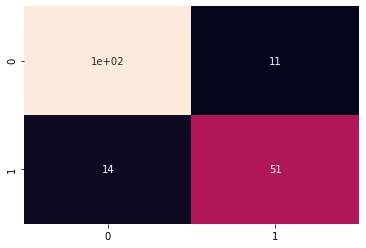

In [89]:
print(f1_score(pred4,Y_test))
sns.heatmap(confusion_matrix(pred4,Y_test),annot=True,cbar=False)

In [90]:
print(X_Test.shape)
pred5=model.predict(X_Test)
pred5=(pred5>.5).astype(int)
pred5=pred5.reshape((1,418))
pred5=np.squeeze(pred5)
pred5


(418, 15)


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [91]:
file='../input/titanic/gender_submission.csv'
submission4=pd.read_csv(file)
submission4['Survived']=pred5
#submission4.to_csv('submission4.csv', index=False, encoding='utf-8')
submission4[submission4['Survived']==0].count()


PassengerId    256
Survived       256
dtype: int64

AttributeError: 'DataFrame' object has no attribute 'csv'

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
lm=LogisticRegression()
str=StratifiedKFold(n_splits=4, shuffle = True, random_state = 999)
param={'C':[.01,.1,.3,.5,1,2,10],'penalty':['l2']}
CV_r = GridSearchCV(estimator=lm, param_grid=param, cv= str,verbose=3)
CV_r.fit(X_Train, Y_Train)
print(CV_r.best_params_) 
print(CV_r.best_estimator_) 


Fitting 4 folds for each of 7 candidates, totalling 28 fits
[CV] C=0.01, penalty=l2 ..............................................
[CV] .................. C=0.01, penalty=l2, score=0.803, total=   0.0s
[CV] C=0.01, penalty=l2 ..............................................
[CV] .................. C=0.01, penalty=l2, score=0.839, total=   0.0s
[CV] C=0.01, penalty=l2 ..............................................
[CV] .................. C=0.01, penalty=l2, score=0.843, total=   0.0s
[CV] C=0.01, penalty=l2 ..............................................
[CV] .................. C=0.01, penalty=l2, score=0.815, total=   0.0s
[CV] C=0.1, penalty=l2 ...............................................
[CV] ................... C=0.1, penalty=l2, score=0.807, total=   0.0s
[CV] C=0.1, penalty=l2 ...............................................
[CV] ................... C=0.1, penalty=l2, score=0.843, total=   0.0s
[CV] C=0.1, penalty=l2 ...............................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... C=1, penalty=l2, score=0.825, total=   0.0s
[CV] C=1, penalty=l2 .................................................
[CV] ..................... C=1, penalty=l2, score=0.824, total=   0.0s
[CV] C=2, penalty=l2 .................................................
[CV] ..................... C=2, penalty=l2, score=0.803, total=   0.0s
[CV] C=2, penalty=l2 .................................................
[CV] ..................... C=2, penalty=l2, score=0.843, total=   0.0s
[CV] C=2, penalty=l2 .................................................
[CV] ..................... C=2, penalty=l2, score=0.821, total=   0.0s
[CV] C=2, penalty=l2 .................................................
[CV] ..................... C=2, penalty=l2, score=0.824, total=   0.0s
[CV] C=10, penalty=l2 ................................................
[CV] .................... C=10, penalty=l2, score=0.798, total=   0.0s
[CV] C=10, penalty=l2 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.3s finished


0.8125
0.7505535282995928


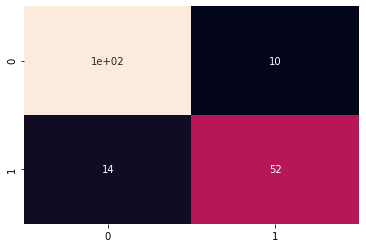

In [94]:
lm=LogisticRegression(penalty='l2',solver='lbfgs',C=.1)
lm.fit(X_train,Y_train)
pred6=lm.predict(X_test)
print(f1_score(pred6,Y_test))
accuracy = cross_val_score(lm, X_train, Y_train, scoring=make_scorer(f1_score), cv = 5)
print(accuracy.mean())
sns.heatmap(confusion_matrix(pred6,Y_test),annot=True,cbar=False)

In [95]:
import xgboost
xgb=xgboost.XGBClassifier(colsample_bytree=0.3,eta=0.1,gamma=0.1)

In [123]:
from sklearn.ensemble import VotingClassifier
eclf1 = VotingClassifier(estimators=[('lr', lm), ('rf', rfc1), ('svm', support1),('xgb',xgb)], voting='hard')

In [124]:
eclf1.fit(X_train,Y_train)


VotingClassifier(estimators=[('lr', LogisticRegression(C=0.1)),
                             ('rf',
                              RandomForestClassifier(max_depth=4,
                                                     random_state=42)),
                             ('svm', SVC(C=1, gamma=0.05, kernel='poly')),
                             ('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=0.3, eta=0.1,
                                            gamma=0.1, gpu_id=-1,
                                            importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.100000001,
                                            max_delta_step=0, max_depth=6,
                

In [125]:
from sklearn.metrics import accuracy_score
for clf in (lm,rfc1,support1,xgb,eclf1):
    clf.fit(X_train,Y_train)
    y_pred=clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(Y_test,y_pred))


LogisticRegression 0.8659217877094972
RandomForestClassifier 0.8603351955307262
SVC 0.8603351955307262
XGBClassifier 0.8659217877094972
VotingClassifier 0.8770949720670391


In [126]:
result=eclf1.predict(X_Test)

In [127]:
file='../input/titanic/gender_submission.csv'
submission5=pd.read_csv(file)
submission5['Survived']=result
submission5.to_csv('submission5.csv', index=False, encoding='utf-8')
submission5[submission5['Survived']==0].count()

PassengerId    257
Survived       257
dtype: int64